**Importing the required libraries**

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, ComplementNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, classification_report, confusion_matrix
from time import time
import warnings
import joblib

**Loading the dataset**

**Dataset (African countries with risk of unsustainable debt) was [downloaded](https://www.kaggle.com/code/gianlab/african-countries-with-risk-of-unsustainable-debt/data?select=DSA_classifications.csv)**

In [56]:
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/DSA/DSA_classifications.csv')
df

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Unnamed: 0,ISO,Year,Risk.ext.debt.distress,Debt.Indicator,Inflation,Cur.acc.bal,Gen.gov.len.bor,Vol.Exp.Goods,GDP,...,US.int.rates,Ext.Debt.Serv,Real.GDP.growth,Exch.Rate,Control.of.Corruption,Government.Effectiveness,Pol.Stability.Absence.of.Violence,Regulatory.Quality,Rule.of.Law,Voice.and.Accountability
0,1,BEN,2005,Moderate,0,4.676,-3.444,-1.523,-1.734,6.571,...,2.981357,4.844119e+07,1.713165,527.258363,-0.850089,4.342373,0.446816,-0.653912,1.958458,-0.029964
1,2,BFA,2005,Moderate,0,6.409,-10.324,-4.890,18.105,6.150,...,2.981357,4.599051e+07,8.661873,527.258363,-0.125748,4.421228,-0.064855,-0.401022,1.979971,-0.446520
2,3,BDI,2005,High,1,13.253,-4.665,-10.556,24.653,1.117,...,2.981357,4.001035e+07,0.900000,1081.577167,-0.930024,3.750419,-1.524742,-1.364591,1.346115,-0.634235
3,4,CMR,2005,Low,0,1.993,-2.757,3.292,-10.677,17.974,...,2.981357,8.188766e+08,2.020662,527.258363,-1.181337,4.090441,-0.183143,-0.929635,1.292113,-1.034067
4,5,CAF,2005,In debt distress,1,2.879,-6.235,-4.343,-6.075,1.413,...,2.981357,6.878445e+06,0.908211,527.258363,-1.278493,3.435491,-1.430053,-1.340983,1.046705,-0.994375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
430,431,SLE,2019,High,1,14.803,-13.510,-2.741,32.525,4.213,...,3.276919,6.465274e+07,5.507686,9010.221144,-0.411361,3.873405,-0.098183,-0.881994,1.733637,-0.096367
431,432,TZA,2019,Low,0,3.449,-2.286,-1.716,8.003,60.810,...,3.276919,1.452282e+09,5.791371,2288.206667,-0.390871,4.120950,-0.362047,-0.640906,1.922069,-0.503791
432,433,TGO,2019,Moderate,0,0.687,-4.264,2.134,3.814,5.459,...,3.276919,1.184743e+08,5.338670,585.911013,-0.749717,4.082665,-0.805393,-0.678982,1.911203,-0.720928
433,434,UGA,2019,Low,0,2.870,-6.488,-5.015,2.995,36.484,...,3.276919,3.000617e+08,6.803327,3704.049072,-1.165626,4.414800,-0.645788,-0.374224,2.185389,-0.623840


#Exploratory data analysis and processing
**Get the summary of the dataset**

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435 entries, 0 to 434
Data columns (total 22 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         435 non-null    int64  
 1   ISO                                435 non-null    object 
 2   Year                               435 non-null    int64  
 3   Risk.ext.debt.distress             435 non-null    object 
 4   Debt.Indicator                     435 non-null    int64  
 5   Inflation                          435 non-null    float64
 6   Cur.acc.bal                        435 non-null    float64
 7   Gen.gov.len.bor                    435 non-null    float64
 8   Vol.Exp.Goods                      435 non-null    float64
 9   GDP                                435 non-null    float64
 10  GDP.per.cap                        435 non-null    float64
 11  Gen.gov.rev                        435 non-null    float64

**Checking for NULL values**

In [38]:
df.isnull().sum()

Unnamed: 0                           0
ISO                                  0
Year                                 0
Risk.ext.debt.distress               0
Debt.Indicator                       0
Inflation                            0
Cur.acc.bal                          0
Gen.gov.len.bor                      0
Vol.Exp.Goods                        0
GDP                                  0
GDP.per.cap                          0
Gen.gov.rev                          0
US.int.rates                         0
Ext.Debt.Serv                        0
Real.GDP.growth                      0
Exch.Rate                            0
Control.of.Corruption                0
Government.Effectiveness             0
Pol.Stability.Absence.of.Violence    0
Regulatory.Quality                   0
Rule.of.Law                          0
Voice.and.Accountability             0
dtype: int64

**Check whats inside Unnamed, ISO and Risk.ext.debt.distress, cols**

In [57]:
df[['Unnamed: 0', 'ISO', 'Risk.ext.debt.distress']]

,Unnamed: 0,ISO,Risk.ext.debt.distress
0,1,BEN,Moderate
1,2,BFA,Moderate
2,3,BDI,High
3,4,CMR,Low
4,5,CAF,In debt distress
...,...,...,...
430,431,SLE,High
431,432,TZA,Low
432,433,TGO,Moderate
433,434,UGA,Low


**Since the aim is to provide an objective point of view for this analysis there's no need for ISO-coded countries column and Unnamed:0 will go as well**

In [39]:
df = df.drop(df[['Unnamed: 0', 'ISO']], axis=1)

**Get basic statistics**

In [40]:
df.describe()

,Year,Debt.Indicator,Inflation,Cur.acc.bal,Gen.gov.len.bor,Vol.Exp.Goods,GDP,GDP.per.cap,Gen.gov.rev,US.int.rates,Ext.Debt.Serv,Real.GDP.growth,Exch.Rate,Control.of.Corruption,Government.Effectiveness,Pol.Stability.Absence.of.Violence,Regulatory.Quality,Rule.of.Law,Voice.and.Accountability
count,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,4.350000e+02,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000
mean,2012.000000,0.331034,6.871616,-7.826372,-1.769368,5.845646,14.684789,910.350483,19.075416,2.559786,2.547764e+08,4.860090,979.683954,-0.732414,4.099295,-0.654002,-0.733614,1.716289,-0.568253
std,4.325468,0.471127,7.064501,9.602180,8.070354,15.142272,15.712689,648.175453,10.367350,1.149619,4.130107e+08,4.108470,1557.030470,0.440817,0.447866,0.742531,0.405311,0.454831,0.555566
min,2005.000000,0.000000,-7.440000,-65.031000,-19.257000,-31.920000,0.125000,148.710000,7.464000,1.137338,5.911556e+05,-36.391977,0.905209,-1.562845,3.151667,-2.699193,-1.683722,0.683501,-1.708204
25%,2008.000000,0.000000,1.776500,-10.374500,-4.219500,-3.465500,3.169500,492.699500,14.021000,1.469299,3.218416e+07,3.265841,147.270705,-1.076309,3.751264,-1.171336,-1.059778,1.389283,-1.079254
50%,2012.000000,0.000000,5.433000,-6.602000,-2.528000,4.734000,10.118000,722.924000,16.320000,2.409470,9.140294e+07,5.057232,510.556338,-0.721615,4.187854,-0.488365,-0.733571,1.766159,-0.484425
75%,2016.000000,1.000000,9.337500,-3.447500,-0.976000,12.764000,18.922000,1141.010000,21.512000,3.082411,2.864674e+08,6.793599,718.932278,-0.479113,4.414614,-0.063518,-0.416785,2.058293,-0.183326
max,2019.000000,1.000000,46.101000,84.849000,125.135000,114.993000,92.796000,4607.390000,164.054000,5.223406,3.002393e+09,20.715768,9183.875864,0.762483,5.266852,0.660963,0.246492,2.649142,0.597521


**Count how the countries are distributed based on Risk.ext.debt.distress**

In [41]:
df['Risk.ext.debt.distress'].value_counts()

Moderate            183
Low                 108
High                 87
In debt distress     57
Name: Risk.ext.debt.distress, dtype: int64

**For a dataset of this size, having 4 categories that are not equal in distribution is unwise (the model might not have enough examples of each category), therefore the 4 categories will become 2 which is exactly the Debt.Indicator column that will become categorical from binary**

*'0' for classifications of 'Low' or 'Moderate' risk of external debt distress, '1' for classifications of 'High' or 'In debt distress'*

**As the author mentions**
**Also Risk.ext.debt.distress is not needed anymore**

In [42]:
df['Debt.Indicator'].replace({0: "LM", 1: "HD"}, inplace=True)
df.drop(df[['Risk.ext.debt.distress']], axis=1, inplace=True)


**Check the distribution again based on the new indicator**

In [43]:
df['Debt.Indicator'].value_counts()

LM    291
HD    144
Name: Debt.Indicator, dtype: int64

**Based on the amount of data in each category is not enough but it is better than having 4 categories with less data**

**Check if data needs scaling ie. has outliers**

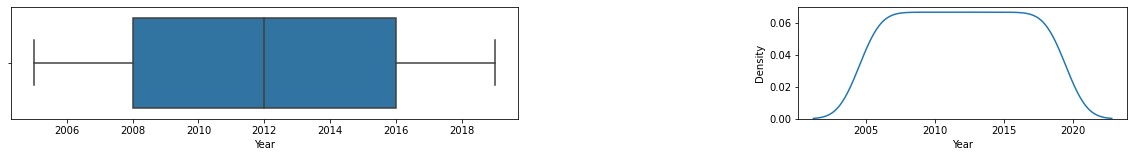

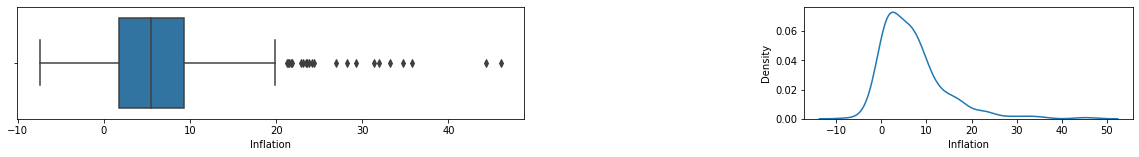

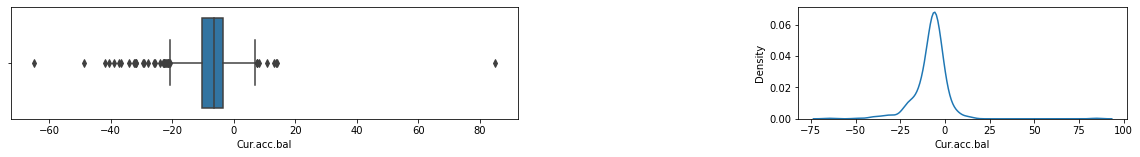

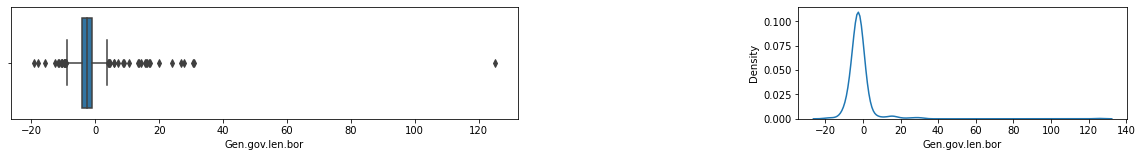

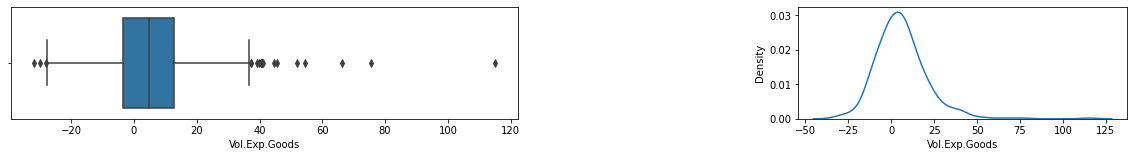

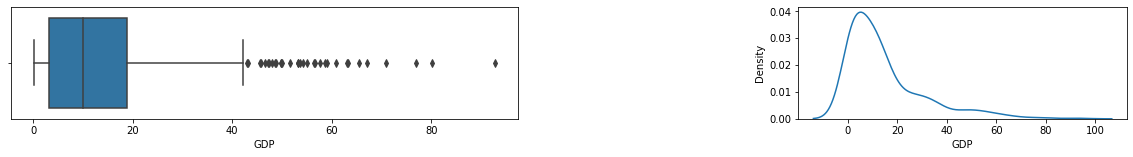

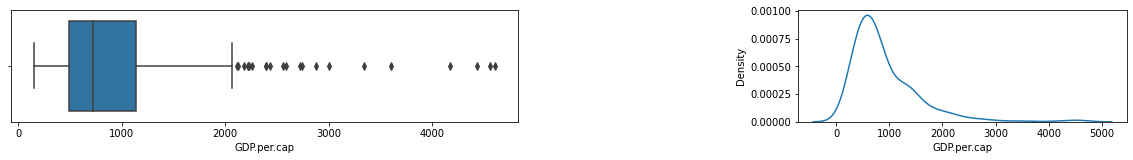

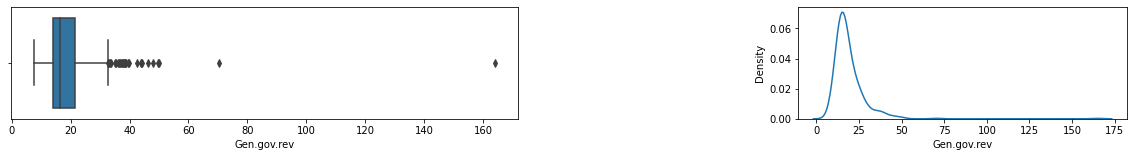

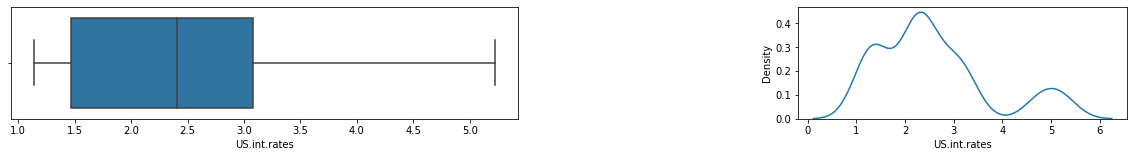

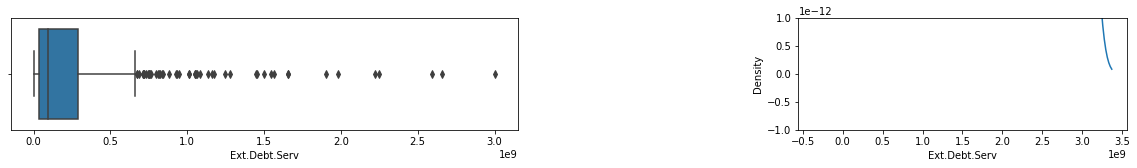

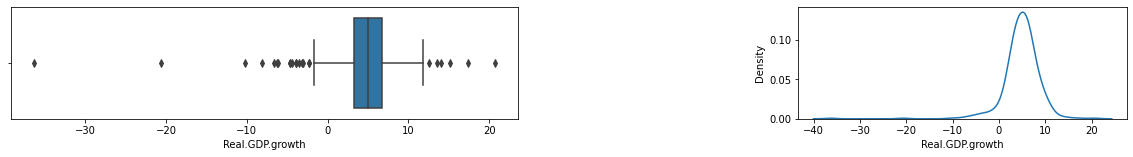

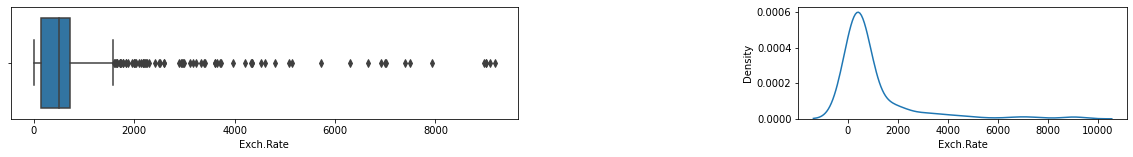

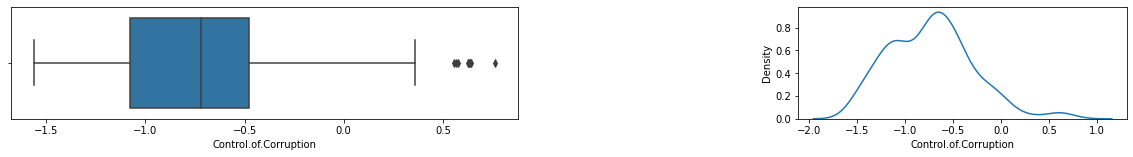

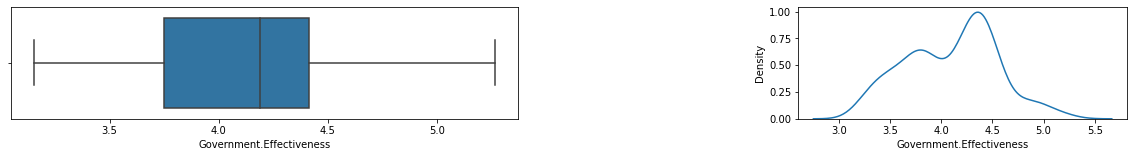

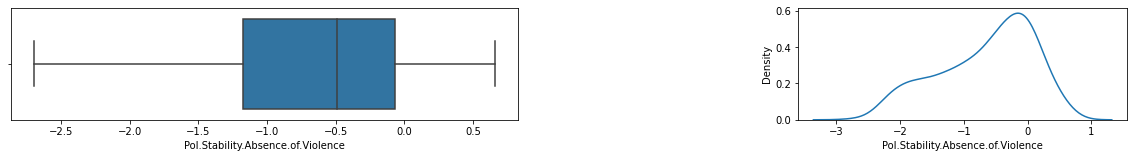

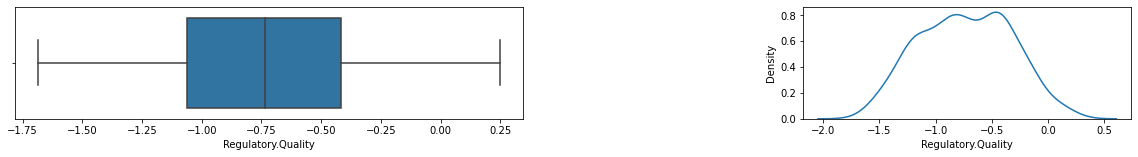

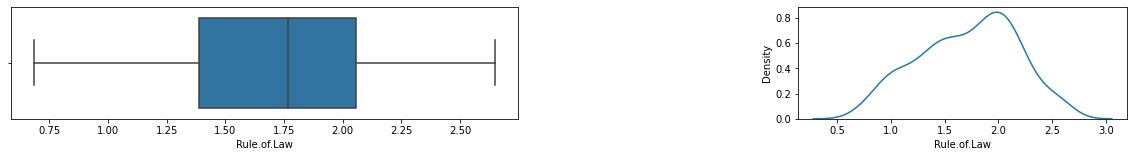

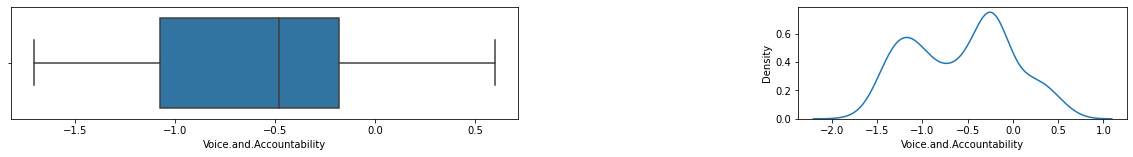

In [44]:
X = df.drop(['Debt.Indicator'], axis=1)

for col in X.columns:
    f = plt.figure(figsize=(20, 7))
    f.add_subplot(3, 2, 1)
    sns.boxplot(x=X[col])
    f.add_subplot(3, 3, 3)
    sns.kdeplot(x=X[col])

**There are a few outliers so scikit-learn MinMaxScaler is gonna be used to normalize the data (initially RobustScaler was chosen but it produces negative values which are not allowed by algorithms such as Complement Naive Bayes - this algorithm was included because it does well for imbalanced datasets)**

In [45]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
y = df['Debt.Indicator']

**There is not that much data, therefore stratify is used when creating the train and test datasets**

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.66, random_state=1, stratify=y)
X_test, X_val = train_test_split(X_test, test_size=0.5, random_state=1)
y_test, y_val = train_test_split(y_test, test_size=0.5, random_state=1)

**K-fold cross validation is gonna be used since the dataset is small  
Defining a function that will provide basic statistics for model training**

In [47]:
def print_results(results, mdl):
    print('BEST PARAMS FOR {} : {}\n'.format(str(mdl).replace('()', ''), results.best_params_))
    print('BEST ACCURACY FOR {0} : {1:.2f}\n'.format(str(mdl).replace('()', ''), results.best_score_))
    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3), params))

**Defining a function that will evaluate the model on validation and test dataset**

In [48]:
def evaluate_model(name, model, features, labels):
    start = time()
    prediction = model.predict(features)
    end = time()
    accuracy = round(accuracy_score(labels, prediction), 3)
    precision = round(precision_score(labels, prediction, pos_label='LM'), 3)
    recall = round(recall_score(labels, prediction, pos_label='LM'), 3)
    print('{} -- Accuracy: {} / Precision: {} / Recall: {} / Latency: {}ms'.format(name,
                                                                                   accuracy,
                                                                                   precision,
                                                                                   recall,
                                                                                   round((end - start)*1000, 1)))
def test_evaluation(name, model, features, labels):
    start = time()
    prediction = model.predict(features)
    end = time()
    print(f'Evaluating {name} on the test data..\n')
    print(classification_report(labels, prediction))
    cf_matrix = confusion_matrix(labels, prediction, labels=["LM", "HD"])
    ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')
    ax.set_xlabel('Predicted Values')
    ax.set_ylabel('Actual Values')
    ax.xaxis.set_ticklabels(['LM','HD'])
    ax.yaxis.set_ticklabels(['LM','HD'])
    

**The algorithms are loaded as a tuple while the parameters for each algorithms as a list of dictionaries**

In [49]:
mdls = LogisticRegression(), SVC(), MLPClassifier(), RandomForestClassifier(), GradientBoostingClassifier(), DecisionTreeClassifier(), GaussianNB(), ComplementNB(), KNeighborsClassifier()

lr_parameters = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}

svc_parameters = {
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'gamma': ['auto', 'scale']
}

mlp_parameters = {
    'hidden_layer_sizes': [5, 10, 25, 50, 100, 500, 1000, ],
    'activation': ['logistic', 'tanh', 'relu'],
    'solver': ['lbfgs', 'sgd', 'adam'],
    'learning_rate': ['constant', 'invscaling', 'adaptive']
}

rf_parameters = {
    'n_estimators': [5, 25, 50, 125, 250, 500, 1000],
    'max_depth': [2, 4, 8, 16, 32],
    'criterion': ['gini', 'entropy'],
    'max_features': ['sqrt', 'log2', None]
}

gb_parameters = {
    'n_estimators': [5, 50, 125, 250, 500],
    'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9],
    'learning_rate': [0.001, 0.01, 0.1, 1, 10, 100],
    'loss': ['exponential'],
    'criterion': ['friedman_mse'],
    'max_features': ['auto', 'sqrt', 'log2']

}

dt_parameters = {
    'max_depth': [2, 4, 8, 16, 32],
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_features': ['sqrt', 'log2', None]
}

gnb_parameters = {}

cnb_parameters = {}

knn_parameters = {
    'n_neighbors': [2, 3, 4, 5],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p': [1, 2],
    'n_jobs': [2]
}

params = [lr_parameters, svc_parameters, mlp_parameters, rf_parameters, gb_parameters, dt_parameters, gnb_parameters, cnb_parameters, knn_parameters]
warnings.filterwarnings("ignore")


# TRAINING
**Using GridSearchCV to find the best hyperparameters**

In [50]:
if len(mdls) == len(params):
    for mdl, param in zip(mdls, params):
        start = time()
        cv = GridSearchCV(mdl, param, cv=5)
        cv.fit(X_train, y_train.values.ravel())
        end = time()
        print('\nTraining took: {0:.3} minutes\n'.format((end-start)/60))
        print_results(cv, mdl)
        joblib.dump(cv.best_estimator_, f'{str(mdl).replace("()","")}_model.pkl')
else:
    print(f'\nParameters nr.: {len(params)}\n Algorithms nr.: {len(mdls)}\n')


Training took: 0.0128 minutes

BEST PARAMS FOR LogisticRegression : {'C': 1, 'solver': 'liblinear'}

BEST ACCURACY FOR LogisticRegression : 0.78

0.667 (+/-0.025) for {'C': 0.001, 'solver': 'newton-cg'}
0.667 (+/-0.025) for {'C': 0.001, 'solver': 'lbfgs'}
0.667 (+/-0.025) for {'C': 0.001, 'solver': 'liblinear'}
0.667 (+/-0.025) for {'C': 0.001, 'solver': 'sag'}
0.667 (+/-0.025) for {'C': 0.001, 'solver': 'saga'}
0.667 (+/-0.025) for {'C': 0.01, 'solver': 'newton-cg'}
0.667 (+/-0.025) for {'C': 0.01, 'solver': 'lbfgs'}
0.667 (+/-0.025) for {'C': 0.01, 'solver': 'liblinear'}
0.667 (+/-0.025) for {'C': 0.01, 'solver': 'sag'}
0.667 (+/-0.025) for {'C': 0.01, 'solver': 'saga'}
0.701 (+/-0.076) for {'C': 0.1, 'solver': 'newton-cg'}
0.701 (+/-0.076) for {'C': 0.1, 'solver': 'lbfgs'}
0.687 (+/-0.061) for {'C': 0.1, 'solver': 'liblinear'}
0.701 (+/-0.076) for {'C': 0.1, 'solver': 'sag'}
0.701 (+/-0.076) for {'C': 0.1, 'solver': 'saga'}
0.783 (+/-0.106) for {'C': 1, 'solver': 'newton-cg'}
0.783

# EVALUATION
**Evaluate the models**

In [54]:
models = {}

for mdl in ['LogisticRegression', 'SVC', 'MLPClassifier', 'RandomForestClassifier', 'GradientBoostingClassifier', 'DecisionTreeClassifier', 'GaussianNB',
            'ComplementNB', 'KNeighborsClassifier']:
    models[mdl] = joblib.load(f'{mdl}_model.pkl')

print(f'\nEvaluating models on the validation dataset: \n')
for name, mdl in models.items():
    evaluate_model(name, mdl, X_val, y_val)



Evaluating models on the validation dataset: 

LogisticRegression -- Accuracy: 0.785 / Precision: 0.803 / Recall: 0.922 / Latency: 0.4ms
SVC -- Accuracy: 0.806 / Precision: 0.878 / Recall: 0.843 / Latency: 0.8ms
MLPClassifier -- Accuracy: 0.799 / Precision: 0.884 / Recall: 0.824 / Latency: 0.6ms
RandomForestClassifier -- Accuracy: 0.875 / Precision: 0.896 / Recall: 0.931 / Latency: 76.4ms
GradientBoostingClassifier -- Accuracy: 0.882 / Precision: 0.905 / Recall: 0.931 / Latency: 1.6ms
DecisionTreeClassifier -- Accuracy: 0.701 / Precision: 0.811 / Recall: 0.755 / Latency: 0.2ms
GaussianNB -- Accuracy: 0.715 / Precision: 0.843 / Recall: 0.735 / Latency: 0.3ms
ComplementNB -- Accuracy: 0.729 / Precision: 0.846 / Recall: 0.755 / Latency: 0.2ms
KNeighborsClassifier -- Accuracy: 0.826 / Precision: 0.853 / Recall: 0.912 / Latency: 102.8ms


**It seems that GradientBoostingClassifier has the highest accuracy   
Let's evaluate on the test set**

**GB evaluation**

Evaluating GradientBoostingClassifier on the test data..

              precision    recall  f1-score   support

          HD       0.86      0.68      0.76        53
          LM       0.83      0.93      0.88        91

    accuracy                           0.84       144
   macro avg       0.85      0.81      0.82       144
weighted avg       0.84      0.84      0.84       144



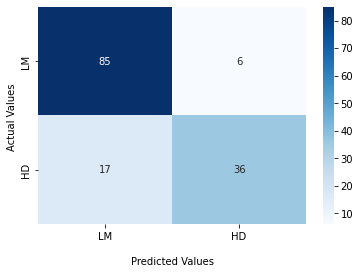

In [53]:
test_evaluation('GradientBoostingClassifier', models['GradientBoostingClassifier'], X_test, y_test)

**I'd say 84% accuracy is acceptable for this type of dataset with its limitations (unbalanced categories, which is proven by the recall and f1 score and the confusion matrix considering the categories size in the test dataset ie. HD - 53 samples & LM - 93 samples)**